In [ ]:
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt

In [ ]:
class grid2d:
    #initialization of the lattice (labeling of the cluster included)
    def __init__(self, N,p):
      self.N = N
      self.cells = np.zeros([N,N])
      self.cells[:,:]=np.floor(np.random.uniform(size=[N,N])+p) 
      self.label=np.zeros([N,N])
      self.clustering()


    #utility function for the Hoshen-Kopelman's algorithm
    def union(self,x,y,labels):
      old=labels[self.find(x,labels)]
      labels[self.find(x,labels)] = self.find(y,labels);     


    #utility function for the Hoshen-Kopelman's algorithm
    def find(self,x,labels):
      x=int(x)
      y = x
      while(labels[y] != y):
        y = labels[y]
      while(labels[x] != x):
        z = labels[x]
        labels[x] = y
        x = z
      return y

    #implementation of the Hoshen-Kopelman's algorithm
    def clustering(self):
      labels=list(range(self.N*self.N))
      largest_label = 0;
      for x in  range(0,self.N):
        for y in range(0,self.N):
            x=int(x)
            y=int(y)
            left=0
            above=0
            if(self.cells[x, y]):
              if(x!=0): left = self.label[x-1, y]
              if(y!=0): above = self.label[x, y-1] 

              if (left == 0) and (above == 0): 
                  largest_label = largest_label + 1; 
                  self.label[x, y] = largest_label;
              elif((left != 0) and (above == 0)):
                  self.label[x, y] = self.find(left,labels)
              elif((left == 0) and (above != 0)):
                  self.label[x, y] = self.find(above,labels)
              else:
                self.union(left,above,labels)
                self.label[x, y] = self.find(left,labels)
      #this cycle give to all the united clusters the same label        
      for x in  range(0,self.N):
        for y in range(0,self.N):
          self.label[x,y]=labels[self.find(int(self.label[x,y]),labels)]

    #return an array with all the clusters and their size
    def count_cluster(self):
      mas=int(np.amax(self.label))
      count=np.zeros(mas)
      for i in range(mas):
        for x in range(self.N):
           for y in range(self.N):
            if(self.label[x,y]==i+1):count[i]+=1
      return count[np.nonzero(count)]

    #return 1 if there is percolation (vertical) 0 otherwise
    def is_perc(self):
      perc=0
      for i in self.label[0]:
        if(i in self.label[(self.N-1)] and i!=0): perc=1
      return perc

    #print the configuretion of the latticce
    def print_config(self):
      X, Y = np.meshgrid(range(self.N+1), range(self.N+1))
      plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
      plt.pcolormesh(X, Y, self.label ,cmap="nipy_spectral")

      plt.tick_params(
      axis='both',         
      which='both',      
      bottom=False,      
      top=False,    
      left=False,
      right=False, 
      labelleft=False,   
      labelbottom=False)

    #get the mean size of the clusters
    def mean_size(self):
     return(np.mean(self.count_cluster()))
       

     #returns the number of clusters
    def n_of_clusters(self):
      return len(self.count_cluster())


         





[ 1. 17.  2.  3.  3.  1.]
6
4.5
False


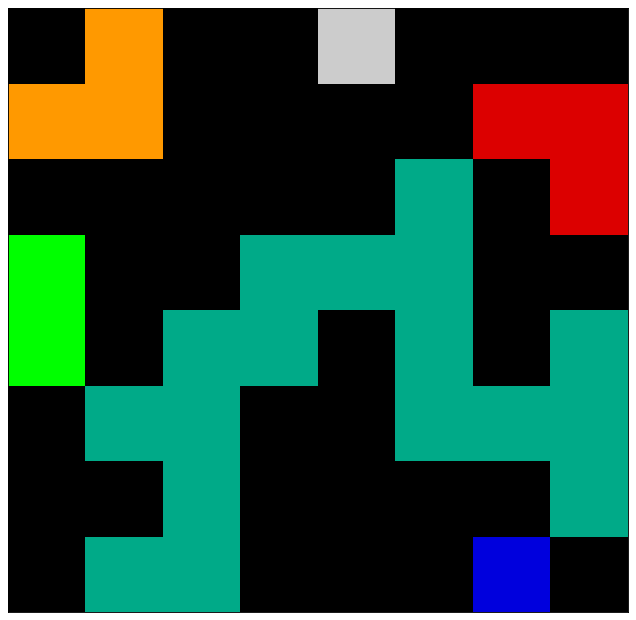

In [ ]:
#test of the various lattice function
lattice=grid2d(8,0.4)
print(lattice.count_cluster())
print(lattice.n_of_clusters())
print(lattice.mean_size())
print(lattice.is_perc()==1)
lattice.print_config()

In [ ]:
# simulation of a single system

mcs=1000
x=np.zeros(mcs)
x2=np.zeros(mcs)
x3=np.zeros(mcs)
x4=np.zeros(mcs)
a=grid2d(128,0.6)
clusters = a.count_cluster()
pa=0.25 # probability of doing something
pb=0.5 # probability of buying (= 1- probability of selling)
dx=0
for t in range(mcs):
  dx=0 #every timestep t the program saves only the fluctuation of the price in  the array x[t]
  for c in clusters:
    if(2*pa<np.random.uniform()):
      if(np.random.uniform()>pb):dx=dx+c
      else:dx=dx-c
  
  x[t]=dx
  x2[t]=dx**2
  x3[t]=dx**3
  x4[t]=dx**4
print("mean price:",np.mean(x))
print("kurtosis:",(sum(x4)/mcs)/((sum(x2)/mcs)-(sum(x)/mcs)**2)**2-3)

mean price: 68.911
kurtosis: -0.9140103385411642


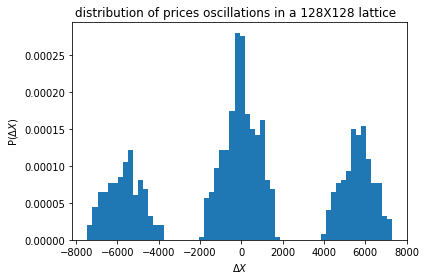

In [ ]:
#visualization of the probability using scipy.stats
lnspc = np.linspace(min(x), max(x), len(x))
m, s = stats.norm.fit(x) 
pdf_g = stats.norm.pdf(lnspc, m, s)  
plt.hist(x,60,density=True)
plt.xlabel("$\Delta X$")
plt.ylabel("P($\Delta X$)")
plt.title("distribution of prices oscillations in a 128X128 lattice  ")
plt.show()  

In [52]:
#simulations to get the std and mean varying the size (or the probability)
pa=0.25 #half of the probability of doing something
pb=0.5 #probability of buiyng
mcs=6000 #total mcs
mv=[]
sv=[]
kurt=[]
x=np.zeros(mcs)
x2=np.zeros(mcs)
x4=np.zeros(mcs)
prob=np.linspace(0.2,0.8,20)
size=np.linspace(8,100,5)
for p in prob:
  a=grid2d(100,p)
  clusters = a.count_cluster()

  dx=0
  x=np.zeros(mcs)
  for t in range(mcs):
    dx=0
    for c in clusters:
      if(2*pa>np.random.uniform()):
        if(np.random.uniform()>pb):dx=dx+c
        else:dx=dx-c
    x[t]=dx
    x2[t]=dx**2
    x4[t]=dx**4

  mv.append(sum(x)/float(mcs))
  sv.append(np.sqrt(sum(x2/float(mcs))-(sum(x)/float(mcs))**2))
  kurt.append((sum(x4)/mcs)/((sum(x2)/mcs)-(sum(x)/mcs)**2)**2-3)

Text(0, 0.5, 'kurtosis')

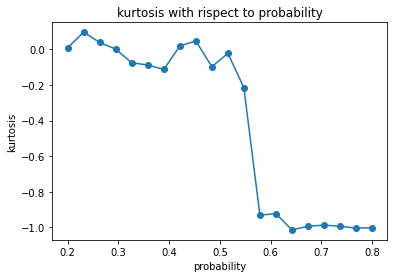

In [55]:
plt.plot(prob,kurt,marker="o")
plt.title("kurtosis with rispect to probability")
plt.xlabel("probability")
plt.ylabel("kurtosis")

Text(0.5, 1.0, 'standard deviation vs probability for L=40 and 10^4 mcs')

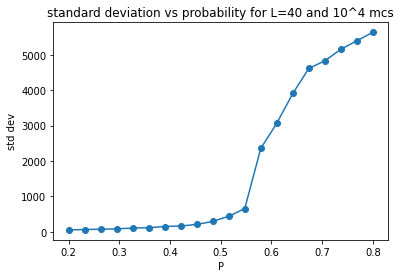

In [62]:
plt.plot(prob,sv,marker="o")
p

plt.xlabel("P")
plt.ylabel("std dev")
plt.title("standard deviation vs probability for L=40 and 10^4 mcs")


In [58]:
#for simulation on different sizes
x=np.log(size)
y=np.log(sv)
m,c=np.polyfit(x,y,1)
x1=np.log(np.linspace(8,108,10))
y1=x1*m+c

plt.plot(x,y,marker="o")
plt.plot(x1,y1,label="y=1.818-0.931")
plt.xlabel("L")
plt.ylabel("std")
plt.title("standard deviation vs side of the lattice for P_a=0.3")
plt.legend()


NameError: ignored